<a href="https://colab.research.google.com/github/bnimni1/Complete-Python-3-Bootcamp/blob/master/MACD_Strategy_Investment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program will calculate the return on investing the QQQ ETF according to the MACD trading strategy.
 
# This strategy means that we Buy when the MACD passes over the MACD signal line from bellow and sell 
# when it passes the MACD signal line from above.
 
# The way I plan to do it is first fetch the Closing data of the QQQ ETF for the last 20 YEARS.
# Than I will calculate the EMA of 26 days and 12 days and calculate the MACD which is the difference between the 
# short term EMA (12 days) and the long term EMA (26 days).
 
# The signal line is the EMA of 9 days.
 
# Calculate the Buy and Sell points according to the MACD strategy, meening when the MACD value is greater the the signal line
# than a buy signal is ON and the Closing price is saved as the buying price.
 
# When the MACD value is less than the signal line than a Sell signal is ON and the closing price is saved as selling price.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas_datareader import data as wb
import datetime

In [ ]:
START_YEARS = 1
STOP_YEARS = 0
STOCK_NAME = 'SPY'
FROM_DATE = '2010-01-01'
DELTA = -0.5

In [ ]:
date = datetime.datetime(2010,1,1)

datetime.datetime(2010, 1, 1, 0, 0)

In [ ]:
# a function that gets as input a stock name (as a string) and possibly start date in the format of 'yyyy-mm-dd' 
# the default start date is '1995-1-1'
# The function returns a data frame with the stock data.
def GetStockData(stock_name, from_date='1995-1-1'):
  return wb.DataReader(stock_name, data_source='yahoo', start=from_date)

In [ ]:
#This function returns the EMA value of a given stock data according o the Close values and the period of the moving average
def CalcEMAOfStock(stock_data, period):
  return stock_data.Close.ewm(span=period, adjust=False).mean()

In [ ]:
#This function returns the series a moving average
def moving_average(stock, days):
  return stock['Close'].rolling(window=days).mean()


In [ ]:
# This function calculates the Buy and Sell signals according to the MACD values with respect to the signal_line value.
# The function return Buy and Sell values lists.
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1
  
  for i in range(0, len(signal)):
    if (signal['MA_200'][i] is not np.nan) and (signal['MACD'][i] < DELTA) and (signal['Close'][i] > signal['MA_200'][i]):
      if signal['MACD'][i] > signal['signal_line'][i]:
        Sell.append(np.nan)
        if flag != 1:
          #print('buy')
          Buy.append(signal['Close'][i])
          flag = 1
        else:
          Buy.append(np.nan)
      elif signal['MACD'][i] < signal['signal_line'][i]:
        Buy.append(np.nan)
        if flag != 0:
          #print('sell')
          Sell.append(signal['Close'][i])
          flag = 0
        else:
          Sell.append(np.nan)
      else:
        Buy.append(np.nan)
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)

  return (Buy, Sell)

In [ ]:
def macd_instagram(stock):
  return stock['MACD'] - stock['signal_line']


In [ ]:
# Get the QQQ values
stock = GetStockData(STOCK_NAME,FROM_DATE)
#calculate the MACD and signal line indicators
#Calculate the short term exponential moving average (EMA)
ShortEMA = CalcEMAOfStock(stock,12)
#calculate the long term exponential moving average
LongEMA = CalcEMAOfStock(stock,26)
#calculate the MACD line
MACD = ShortEMA - LongEMA
#calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()
 
stock['MA_200'] = moving_average(stock,200)
stock['MA_200'][0:200] = np.nan
stock['MACD'] = MACD
stock['signal_line'] = signal
stock['Buy_Signal_Price'] = buy_sell(stock)[0]
stock['Sell_Signal_Price'] = buy_sell(stock)[1]
stock['MACD_instagram'] = macd_instagram(stock)
# save the stock DataFrame in Excel
stock.to_excel(r'C:\Users\benny\Documents\demo.xlsx', index=False)

(array([737303., 737364., 737425., 737485., 737546., 737607.]),
 <a list of 6 Text major ticklabel objects>)

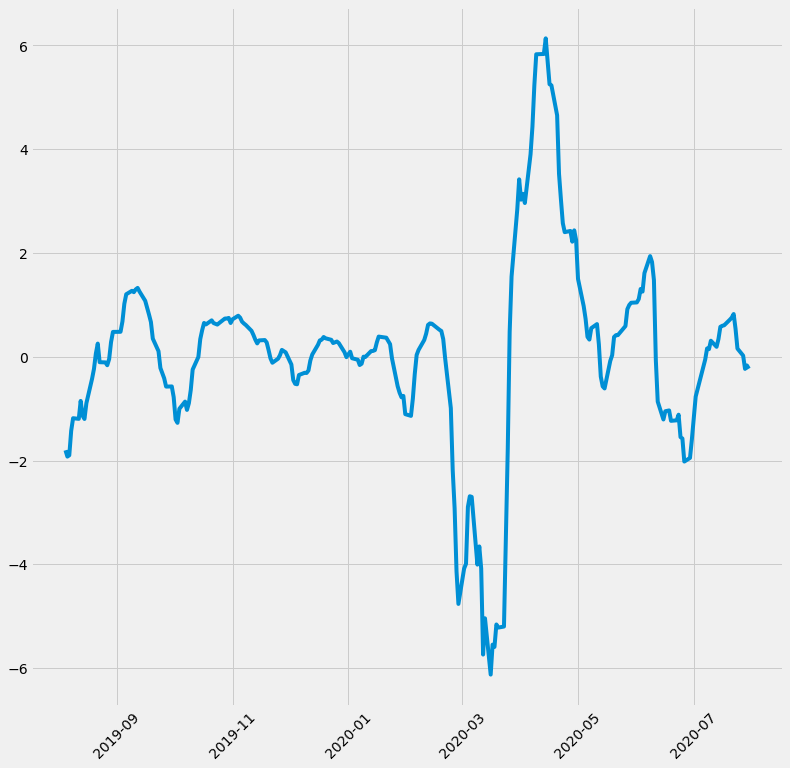

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(stock.index[-START_YEARS*250:],stock['MACD_instagram'][-START_YEARS*250:],label='MACD_instagram')
plt.xticks(rotation=45)

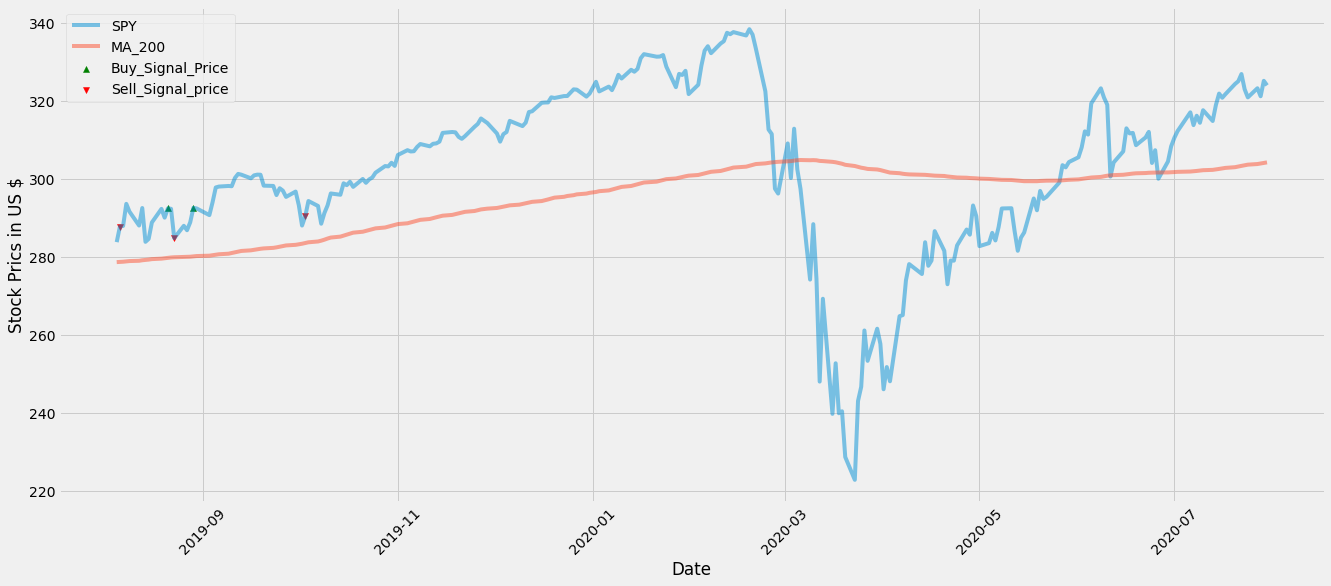

In [ ]:
plt.figure(figsize=(20.2, 8.5)) 
if STOP_YEARS == 0:
  plt.plot(stock.index[-START_YEARS*250:],stock['Close'][-START_YEARS*250:],alpha=0.5,label=STOCK_NAME)
  plt.plot(stock.index[-START_YEARS*250:],stock['MA_200'][-START_YEARS*250:],alpha=0.5,label='MA_200')
  plt.scatter(stock.index[-START_YEARS*250:],stock['Buy_Signal_Price'][-START_YEARS*250:],marker='^',color='green',label='Buy_Signal_Price')
  plt.scatter(stock.index[-START_YEARS*250:],stock['Sell_Signal_Price'][-START_YEARS*250:],marker='v',color='red',label='Sell_Signal_price')
else:
  plt.plot(stock.index[-START_YEARS*250:-STOP_YEARS*250],stock['Close'][-START_YEARS*250:-STOP_YEARS*250],alpha=0.5,label=STOCK_NAME)
  plt.plot(stock.index[-START_YEARS*250:-STOP_YEARS*250],stock['MA_200'][-START_YEARS*250:-STOP_YEARS*250],alpha=0.5,label='MA_200')
  plt.scatter(stock.index[-START_YEARS*250:-STOP_YEARS*250],stock['Buy_Signal_Price'][-START_YEARS*250:-STOP_YEARS*250],marker='^',color='green',label='Buy_Signal_Price')
  plt.scatter(stock.index[-START_YEARS*250:-STOP_YEARS*250],stock['Sell_Signal_Price'][-START_YEARS*250:-STOP_YEARS*250],marker='v',color='red',label='Sell_Signal_price')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel("Stock Prics in US $")
plt.legend(loc='upper left')

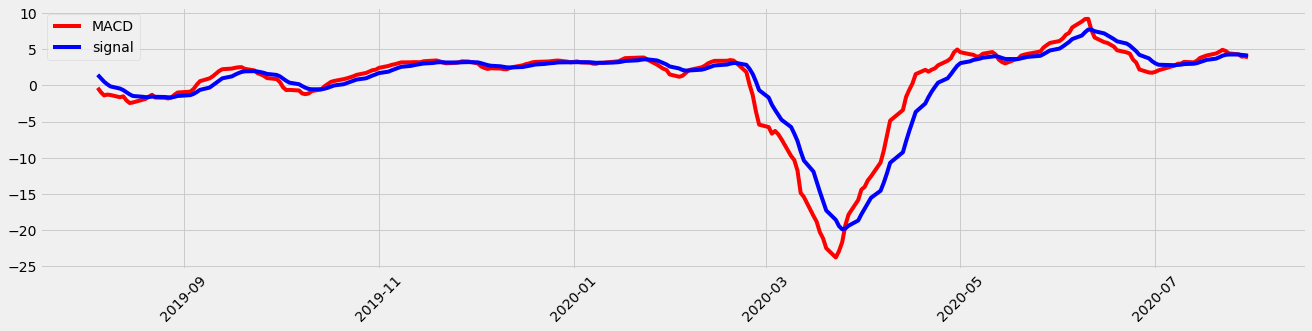

In [ ]:
#plot the chart
plt.figure(figsize=(20.2, 4.5))
if STOP_YEARS == 0:
  plt.plot(stock.index[-START_YEARS*250:], stock['MACD'][-START_YEARS*250:], color='red', label='MACD')
  plt.plot(stock.index[-START_YEARS*250:], stock['signal_line'][-START_YEARS*250:], color='blue', label='signal')
else:
  plt.plot(stock.index[-START_YEARS*250:-STOP_YEARS*250], stock['MACD'][-START_YEARS*250:-STOP_YEARS*250], color='red', label='MACD')
  plt.plot(stock.index[-START_YEARS*250:-STOP_YEARS*250], stock['signal_line'][-START_YEARS*250:-STOP_YEARS*250], color='blue', label='signal')
plt.xticks(rotation=45) 
plt.legend(loc='upper left')
plt.show()

In [ ]:
#@title Calculate the profit according to MACD strategy
profit=0
flag=1
for i in range(0, len(stock)):
  #flag=1 for the buy timing point
  if flag == 1:
    if pd.notnull(stock['Buy_Signal_Price'][i]):
      #profit=stock['Buy_Signal_Price'][i]-profit
      buy_price=stock['Buy_Signal_Price'][i]
      flag=0
  #flag=0 for the sell timming point
  if flag == 0:
    if pd.notnull(stock['Sell_Signal_Price'][i]):
      profit=profit+stock['Sell_Signal_Price'][i]-buy_price
      flag=1

In [ ]:
profit

89.02005004882812

In [ ]:
stock['Close'][-1]-stock['Close'][0]

210.62998962402344

In [ ]:
buy_price
stock['Close'][0]

113.33000183105469

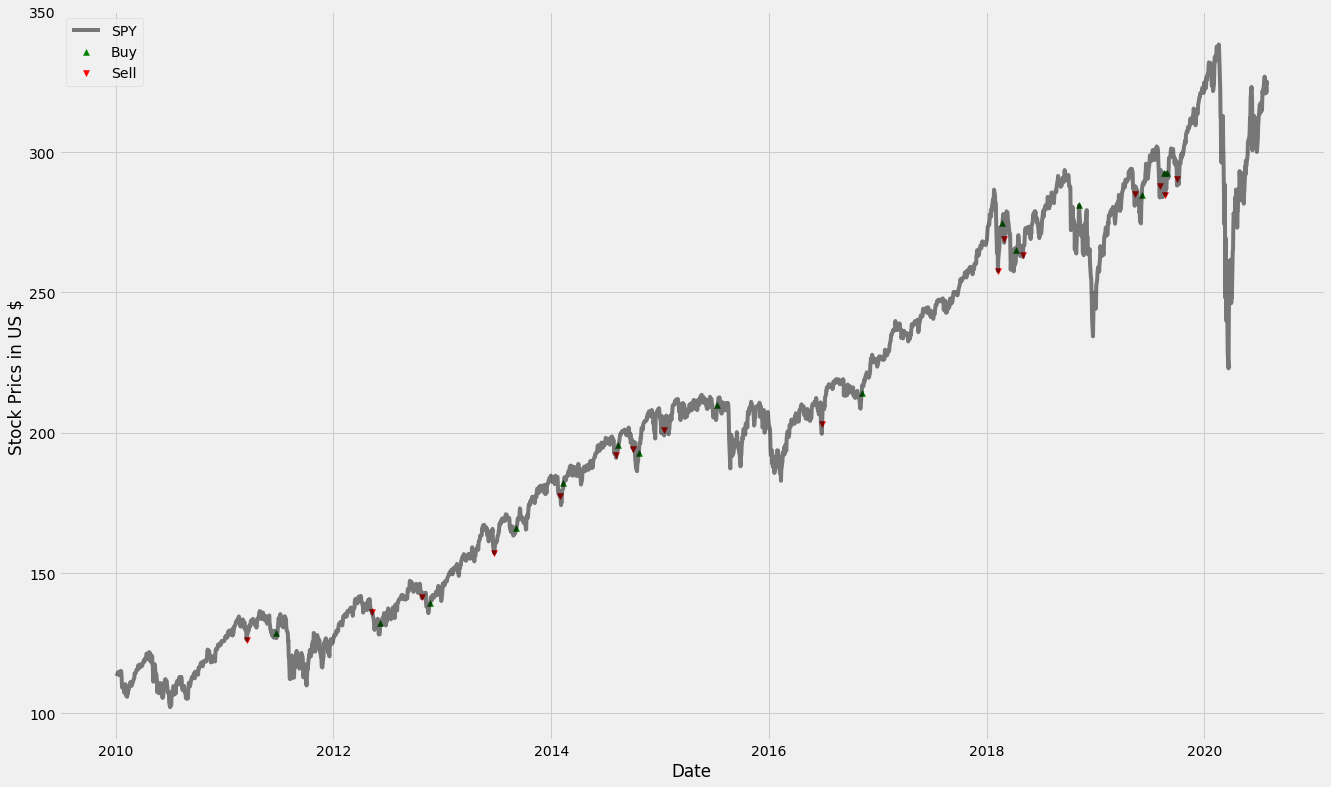

In [ ]:
#plot the chart
plt.figure(figsize=(20.2, 12.5))
 
plt.plot(stock.index, stock['Close'], color='black', label=STOCK_NAME,alpha=0.5)
plt.scatter(stock.index, stock['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(stock.index, stock['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel("Stock Prics in US $")
plt.show()